In [ ]:
import numpy as np
import pandas as pd

# mount google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# read all data
feature_scores_keybert = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/feature_scores_keybert.csv')
feature_scores_topics = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/feature_scores_topics.csv')

X_train_keybert = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/x_train_keybert.csv')
X_test_keybert = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/x_test_keybert.csv')

X_train_topics = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/X_train_topics.csv')
X_test_topics = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/X_test_topics.csv')

y_train = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/y_train.csv')
y_test = pd.read_csv('/content/drive/My Drive/BT4222 group project/final_data/y_test.csv')

## Top 100 features from linear regression feature selection

In [ ]:
# get top 100 feature columns
n = 100
top_keybert = list(feature_scores_keybert.iloc[0:1 , :n])
top_topics = list(feature_scores_topics.iloc[0:1 , :n])

In [ ]:
# remove features
x_train_keybert = X_train_keybert[top_keybert]
x_test_keybert = X_test_keybert[top_keybert]
x_train_topics = X_train_topics[top_topics]
x_test_topics = X_test_topics[top_topics]
x_train_keybert.head()

,Horror,type,Drama,Thriller,Sci-Fi,Animation,Documentary,History,release_year,Biography,...,Cast_briankrause,Keyword_journey,Cast_billyzane,Cast_cynthiarothrock,Keyword_character,Cast_vernonwells,Cast_stevenseagal,Keyword_child,Cast_michaelironside,Keyword_death
0,0.0,0,1.0,1.0,0.0,0.0,0.0,0.0,2015,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,1
1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,1934,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
2,1.0,0,0.0,0.0,1.0,0.0,0.0,0.0,1975,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
3,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,2011,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0
4,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,1973,0.0,...,0.0,0,0.0,0.0,0,0.0,0.0,0,0.0,0


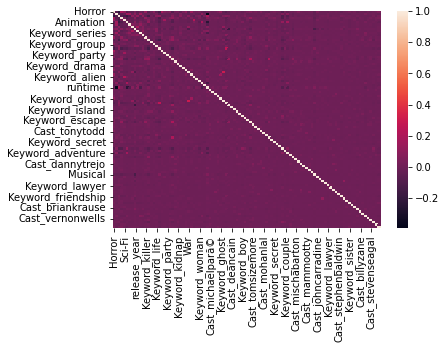

In [ ]:
import seaborn as sns
sns.heatmap(x_train_keybert.corr())

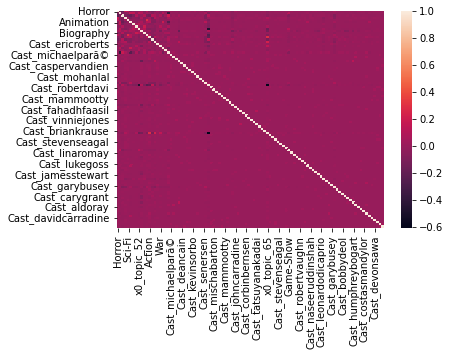

In [ ]:
sns.heatmap(x_train_topics.corr())

In [ ]:
import numpy as np
from sklearn import datasets, linear_model

# Create linear regression object
lm_k = linear_model.LinearRegression()
lm_t = linear_model.LinearRegression()

# Train the model using the training sets
lm_fit_keybert = lm_k.fit(x_train_keybert, y_train)
lm_fit_topics = lm_t.fit(x_train_topics, y_train)

# Make predictions using the testing set
y_pred_keybert = lm_fit_keybert.predict(x_test_keybert)
y_pred_topics = lm_fit_topics.predict(x_test_topics)

## MAE, MSE and RMSE for keybert & topic model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("MAE for keybert:", mean_absolute_error(y_test, y_pred_keybert))
print("MSE for keybert:", mean_squared_error(y_test, y_pred_keybert))
print("RMSE for keybert:", np.sqrt(mean_squared_error(y_test, y_pred_keybert)))

print("MAE for topic:", mean_absolute_error(y_test, y_pred_topics))
print("MSE for topic:", mean_squared_error(y_test, y_pred_topics))
print("RMSE for topic:", np.sqrt(mean_squared_error(y_test, y_pred_topics)))

MAE for keybert: 0.8953577128804082
MSE for keybert: 1.3372569076619147
RMSE for keybert: 1.1563982478635613
MAE for topic: 0.900398069607904
MSE for topic: 1.3534166894607498
RMSE for topic: 1.1633643837855574
